# Análisis de datos de Proyectos cuidado

Universidad EAFIT, 2025

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Información proyectoPCS inicial
# Load the Excel file and specify the sheet name
file_path = "data/inputs/Matriz propuestas trabajadas sobre TCR.xlsx"
py_ini = pd.read_excel(file_path, sheet_name="Información proyectoPCS inicial")

# Clean column names
py_ini.columns = py_ini.columns.str.replace('[^A-Za-z0-9]+', '_').str.strip()

# Display the cleaned column names
print(py_ini.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'data/inputs/Matriz propuestas trabajadas sobre TCR.xlsx'

## Estadísticas básicas de los proyectos productivos

En esta sección exploramos los datos iniciales 

/Users/jcmunoz/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jcmunoz/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jcmunoz/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jcmunoz/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

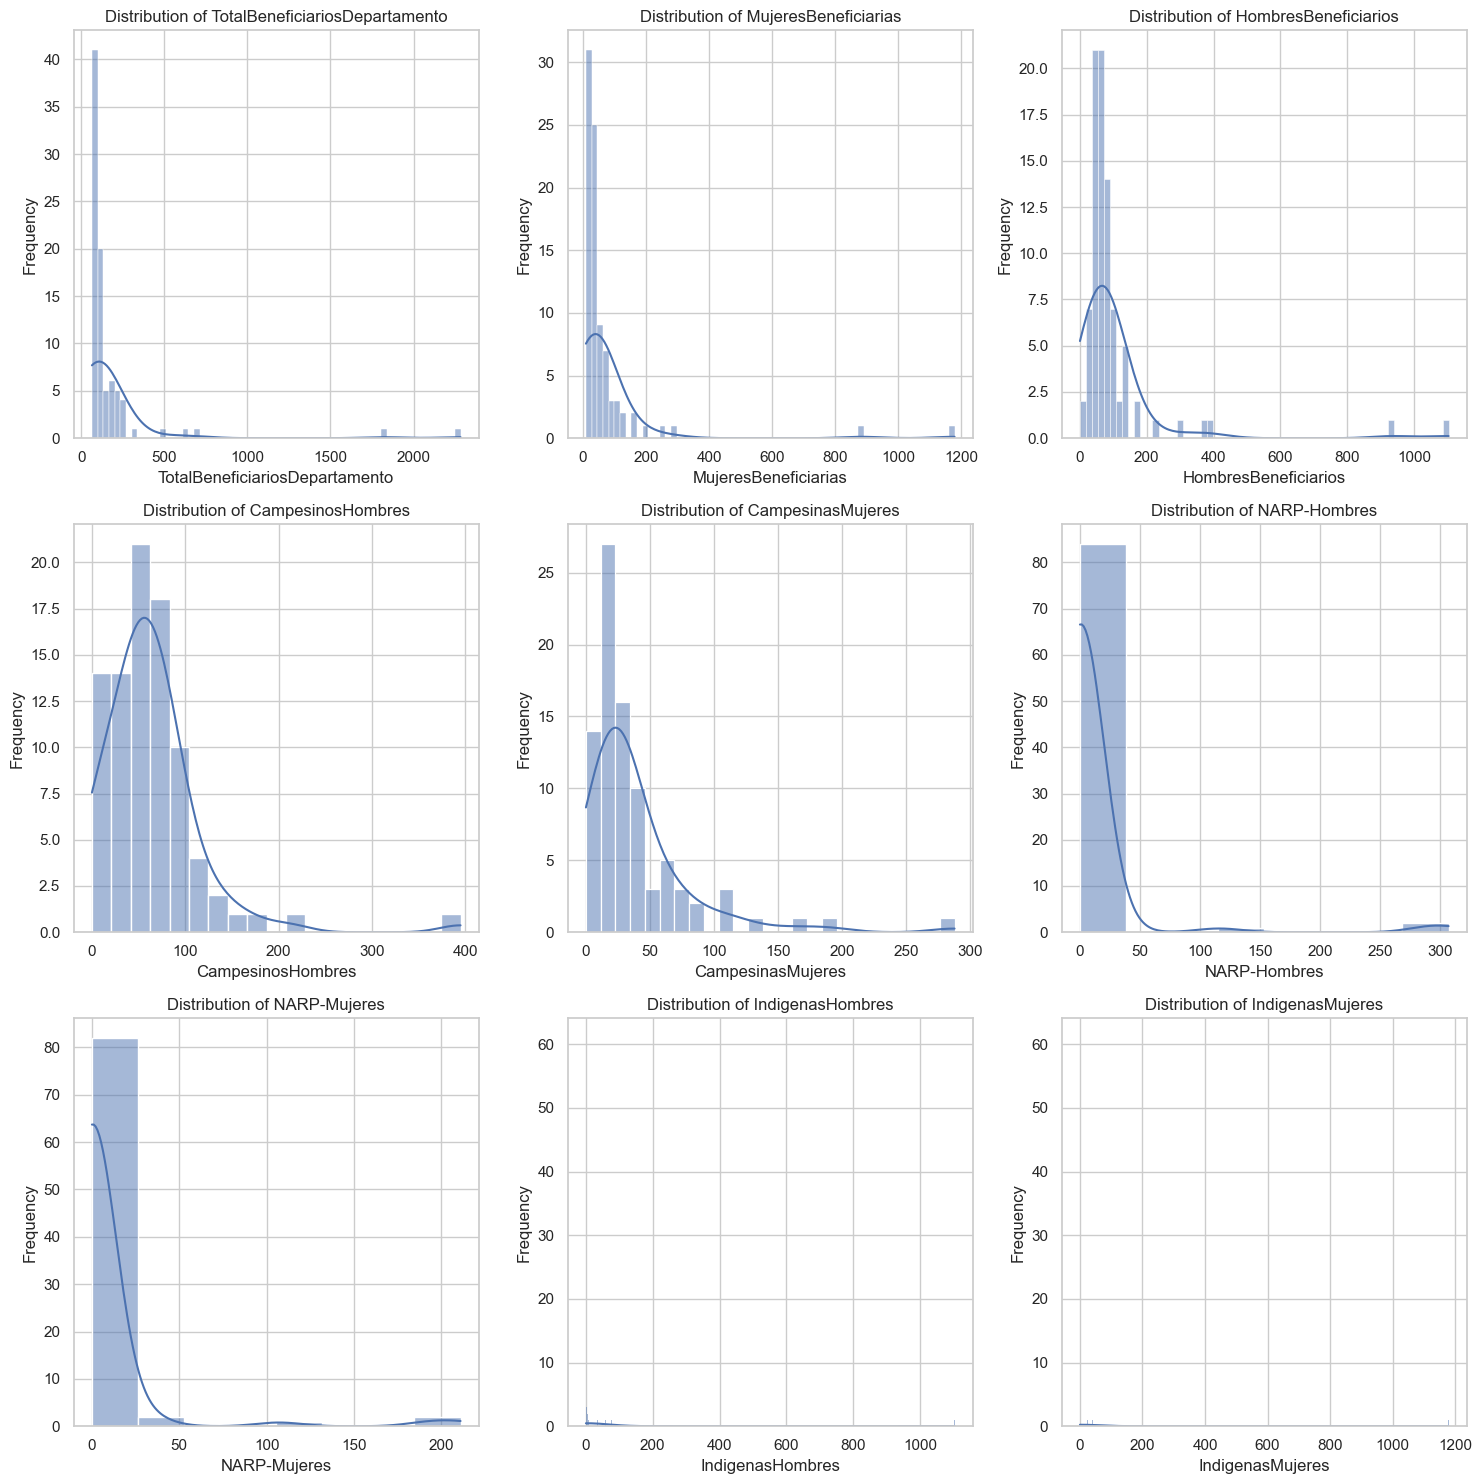

In [2]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of variables to plot
variables = ['TotalBeneficiariosDepartamento', 'MujeresBeneficiarias', 'HombresBeneficiarios', 
             'CampesinosHombres', 'CampesinasMujeres', 'NARP-Hombres', 'NARP-Mujeres', 
             'IndigenasHombres', 'IndigenasMujeres']

# Plot each variable
for i, var in enumerate(variables):
    sns.histplot(py_ini[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [3]:
# Select the relevant columns
selected_columns = py_ini[variables]

# Generate summary statistics
summary_stats = selected_columns.describe()

# Display the summary statistics
print(summary_stats)

       TotalBeneficiariosDepartamento  MujeresBeneficiarias  \
count                       87.000000             87.000000   
mean                       176.827586             74.149425   
std                        309.830269            157.135368   
min                         65.000000              9.000000   
25%                         73.000000             22.500000   
50%                        100.000000             38.000000   
75%                        149.000000             63.000000   
max                       2283.000000           1179.000000   

       HombresBeneficiarios  CampesinosHombres  CampesinasMujeres  \
count             87.000000          87.000000          87.000000   
mean             102.678161          62.724138          39.287356   
std              155.708172          54.394915          44.357928   
min                0.000000           0.000000           0.000000   
25%               50.500000          33.000000          18.000000   
50%               

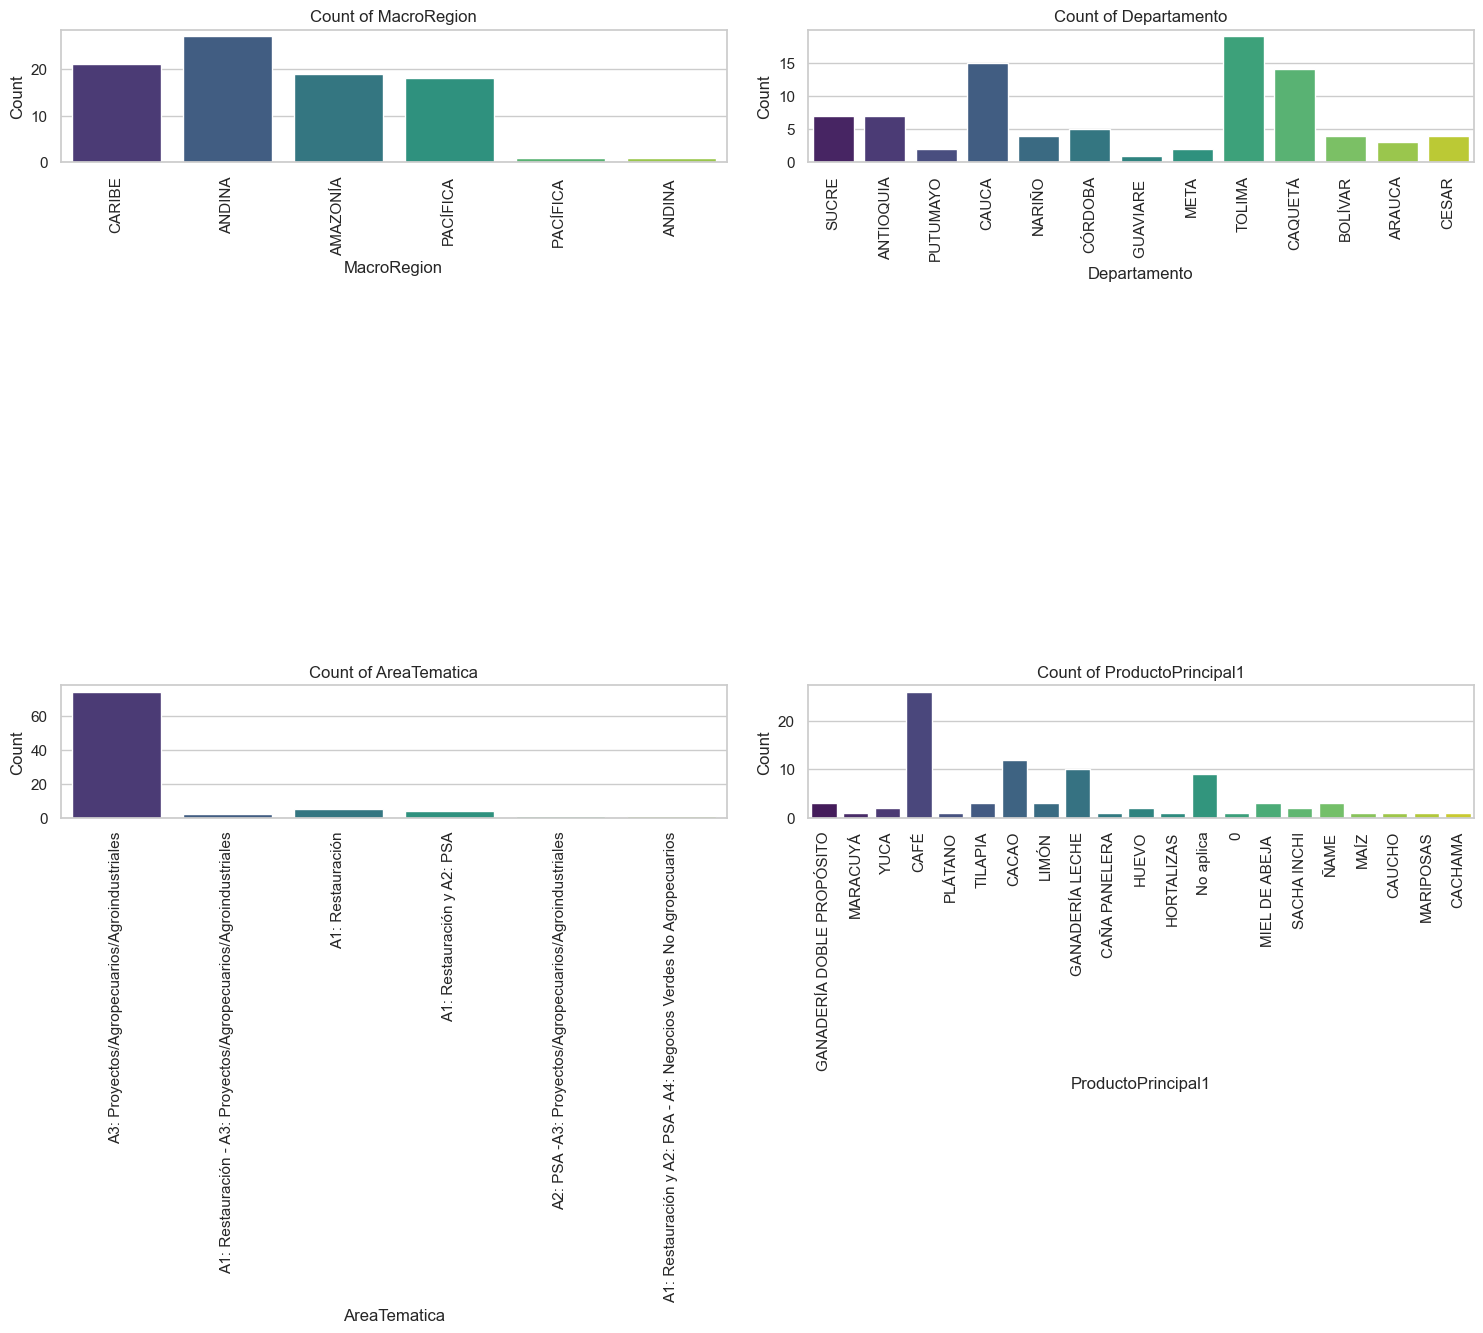

In [4]:
# List of categorical variables to plot
categorical_vars = ['MacroRegion', 'Departamento', 'Tipo_de_Beneficiario', 'AreaTematica', 'ProductoPrincipal1']

# Verificar que las variables categóricas existen en el DataFrame
categorical_vars = [var for var in categorical_vars if var in py_ini.columns]

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Ajusta el número de filas y columnas según sea necesario

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(data=py_ini, x=var, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Count of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Eliminar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Ahora vamos a ver un poco las distribuciones espaciales

                      NAME_1
0                   Amazonas
1                  Antioquia
2                     Arauca
3                  Atlßntico
4                    BolÝvar
5                     Boyacß
6                     Caldas
7                    Caquetß
8                   Casanare
9                      Cauca
10                     Cesar
11                     Choc¾
12                   C¾rdoba
13              Cundinamarca
14                   GuainÝa
15                  Guaviare
16                     Huila
17                La Guajira
18                 Magdalena
19                      Meta
20                    Nari±o
21        Norte de Santander
22                  Putumayo
23                   QuindÝo
24                 Risaralda
25  San AndrÚs y Providencia
26                 Santander
27                     Sucre
28                    Tolima
29           Valle del Cauca
30                    VaupÚs
31                   Vichada


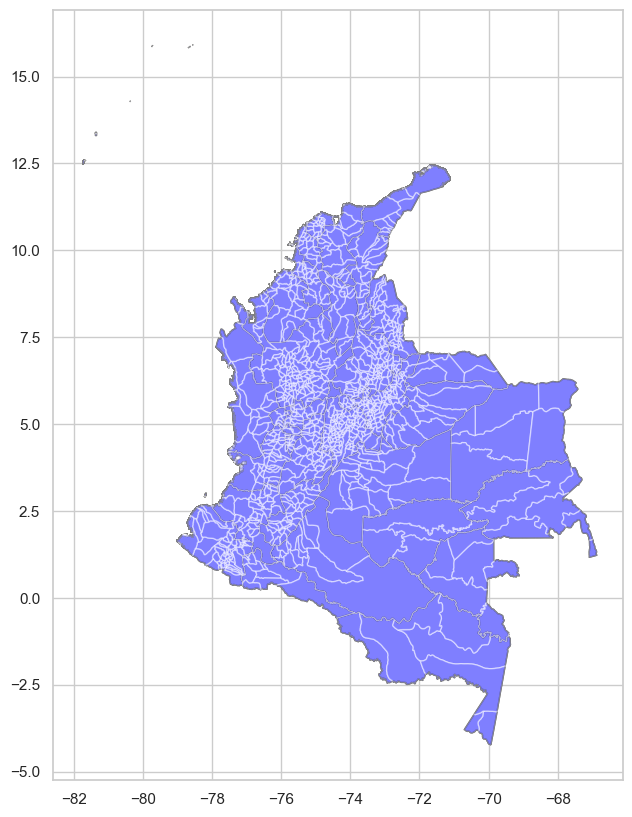

In [5]:
# Load the shapefiles
dpto_shapefile = gpd.read_file("02_Data/Colombia_Division/COL_adm1.shp")
mpio_shapefile = gpd.read_file("02_Data/Colombia_Division/COL_adm2.shp")

# Plot the shapefiles
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
dpto_shapefile.plot(ax=ax, color='white', edgecolor='black')
mpio_shapefile.plot(ax=ax, color='blue', alpha=0.5)

# Display the 'NMG' column of the dpto_shapefile dataframe
print(dpto_shapefile[['NAME_1']])

In [6]:
# Define the mapping of incorrect names to correct names
name_corrections = {
    'Sucre' : 'SUCRE',
    'Antioquia' : 'ANTIOQUIA',
    'Putumayo' : 'PUTUMAYO',
    'Cauca' : 'CAUCA',
    'Nari±o' : 'NARIÑO',
    'C¾rdoba' : 'CÓRDOBA',
    'Guaviare' : 'GUAVIARE',
    'Meta' : 'META',
    'Tolima' : 'TOLIMA',
    'Caquetß' : 'CAQUETA',
    'BolÝvar' : 'BOLIVAR',
    'Arauca': 'ARAUCA',
    'Cesar': 'CESAR'
}

# Apply the corrections to the NAME_2 column
dpto_shapefile['NAME_1'] = dpto_shapefile['NAME_1'].replace(name_corrections)

# Display the corrected names
print(dpto_shapefile['NAME_1'].unique())

['Amazonas' 'ANTIOQUIA' 'ARAUCA' 'Atlßntico' 'BOLIVAR' 'Boyacß' 'Caldas'
 'CAQUETA' 'Casanare' 'CAUCA' 'CESAR' 'Choc¾' 'CÓRDOBA' 'Cundinamarca'
 'GuainÝa' 'GUAVIARE' 'Huila' 'La Guajira' 'Magdalena' 'META' 'NARIÑO'
 'Norte de Santander' 'PUTUMAYO' 'QuindÝo' 'Risaralda'
 'San AndrÚs y Providencia' 'Santander' 'SUCRE' 'TOLIMA' 'Valle del Cauca'
 'VaupÚs' 'Vichada']


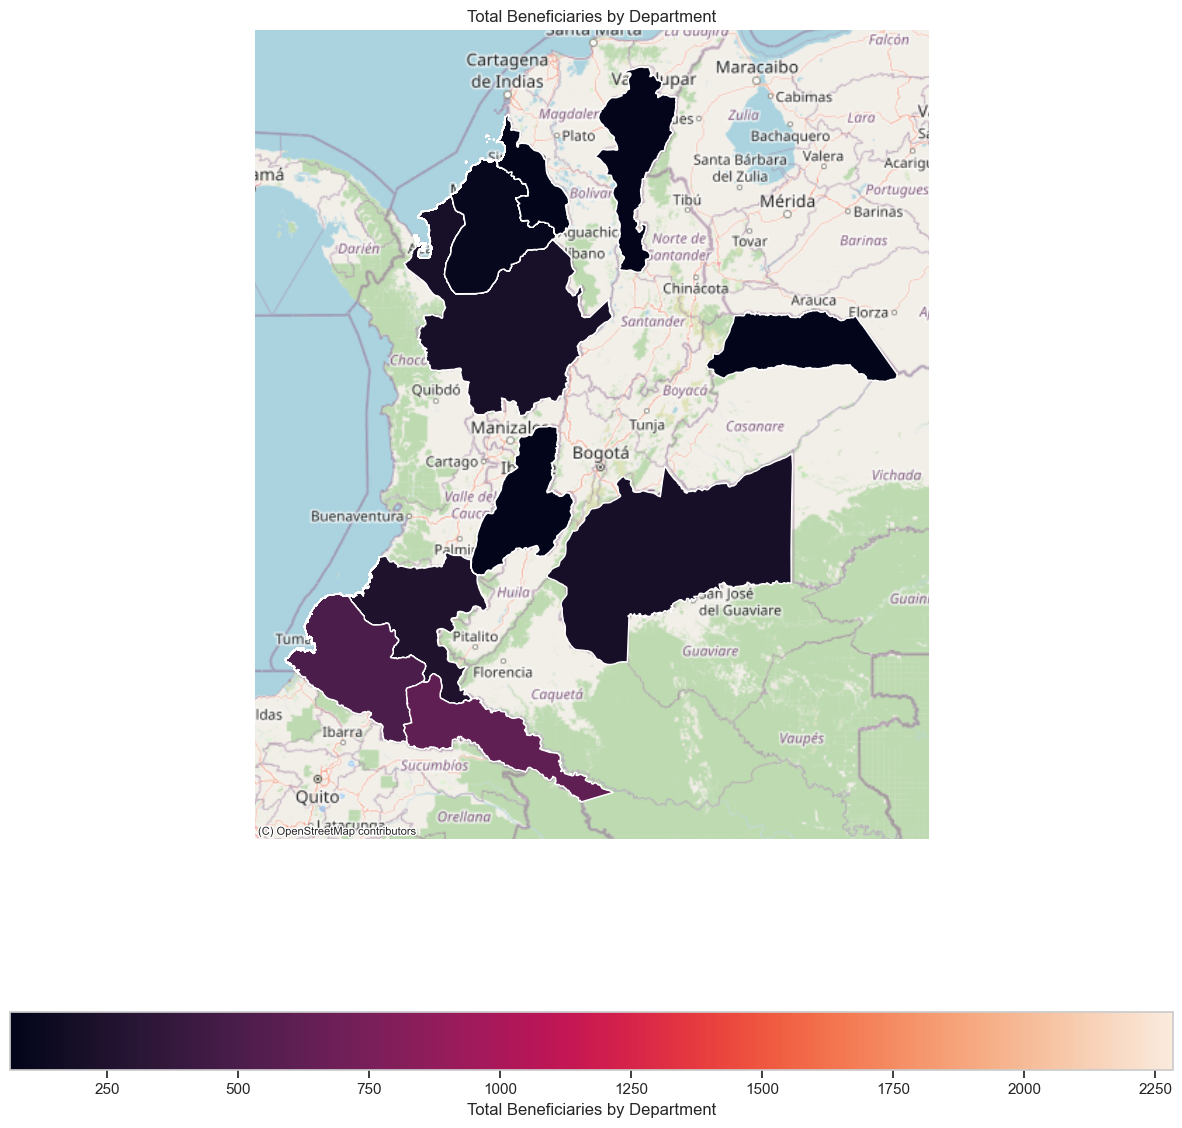

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Merge the shapefile with the project data
merged_data = dpto_shapefile.merge(py_ini, left_on='NAME_1', right_on='Departamento')

# Replace NA values with 0 in the 'TotalBeneficiariosDepartamento' column
merged_data['TotalBeneficiariosDepartamento'] = merged_data['TotalBeneficiariosDepartamento'].fillna(0)

# Convert to Web Mercator projection (EPSG:3857) for compatibility with contextily
merged_data = merged_data.to_crs(epsg=3857)

# Plot the map with TotalBeneficiariosDepartamento
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_data.plot(column='TotalBeneficiariosDepartamento', ax=ax, legend=True,
                 legend_kwds={'label': "Total Beneficiaries by Department",
                              'orientation': "horizontal"})

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Improve the layout by removing x-axis and y-axis
ax.set_axis_off()

plt.title('Total Beneficiaries by Department')
plt.show()

Number of projects with ProductoPrincipal1 as 'CAFÉ' and Tipo de Beneficiario as 'CAMPESINO': 18


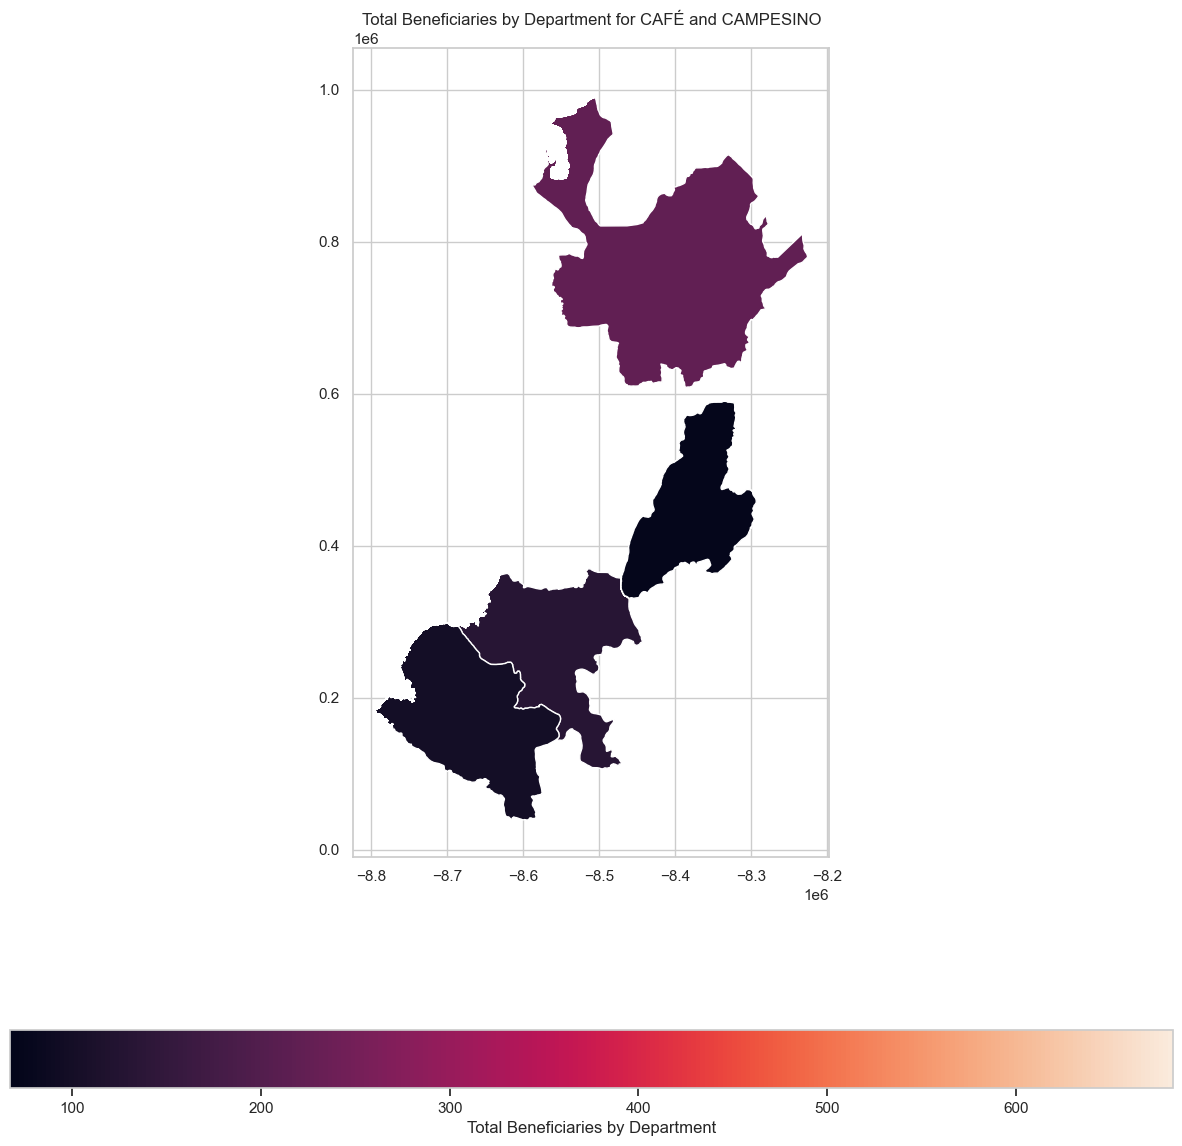

In [9]:
# Filter the data
filtered_data = py_ini[(py_ini['ProductoPrincipal1'] == 'CAFÉ') & (py_ini['Tipo de Beneficiario'] == 'CAMPESINO')]

# Get the number of such projects
num_projects = filtered_data.shape[0]
print(f"Number of projects with ProductoPrincipal1 as 'CAFÉ' and Tipo de Beneficiario as 'CAMPESINO': {num_projects}")

# Merge the filtered data with the shapefile
merged_filtered_data = dpto_shapefile.merge(filtered_data, left_on='NAME_1', right_on='Departamento')

# Replace NA values with 0 in the 'TotalBeneficiariosDepartamento' column
merged_filtered_data['TotalBeneficiariosDepartamento'] = merged_filtered_data['TotalBeneficiariosDepartamento'].fillna(0)

# Convert to Web Mercator projection (EPSG:3857) for compatibility with contextily
merged_filtered_data = merged_filtered_data.to_crs(epsg=3857)

# Plot the map with TotalBeneficiariosDepartamento
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_filtered_data.plot(column='TotalBeneficiariosDepartamento', ax=ax, legend=True,
                          legend_kwds={'label': "Total Beneficiaries by Department",
                                       'orientation': "horizontal"})

plt.title('Total Beneficiaries by Department for CAFÉ and CAMPESINO')
plt.show()

/var/folders/dv/3wtcrb9s03n5nj64bl19r6qjqcgl9l/T/ipykernel_12930/2268113654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=beneficiaries_by_product, x='ProductoPrincipal1', y='TotalBeneficiariosDepartamento', palette="viridis")


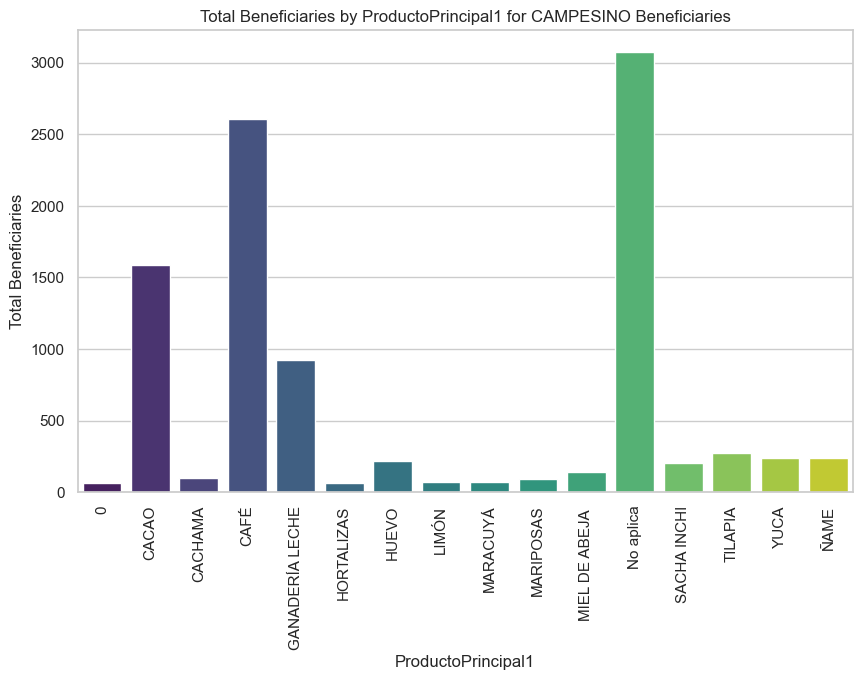

In [81]:
# Filter the data for 'CAMPESINO' beneficiaries
campesino_data = py_ini[py_ini['Tipo de Beneficiario'] == 'CAMPESINO']

# Group by 'ProductoPrincipal1' and sum the 'TotalBeneficiariosDepartamento'
beneficiaries_by_product = campesino_data.groupby('ProductoPrincipal1')['TotalBeneficiariosDepartamento'].sum().reset_index()

# Plot the composition of 'ProductoPrincipal1' for 'CAMPESINO' beneficiaries
plt.figure(figsize=(10, 6))
sns.barplot(data=beneficiaries_by_product, x='ProductoPrincipal1', y='TotalBeneficiariosDepartamento', palette="viridis")
plt.title('Total Beneficiaries by ProductoPrincipal1 for CAMPESINO Beneficiaries')
plt.xlabel('ProductoPrincipal1')
plt.ylabel('Total Beneficiaries')
plt.xticks(rotation=90)
plt.show()

/var/folders/dv/3wtcrb9s03n5nj64bl19r6qjqcgl9l/T/ipykernel_12930/3919292330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=campesino_data, x='ProductoPrincipal1', palette="viridis")


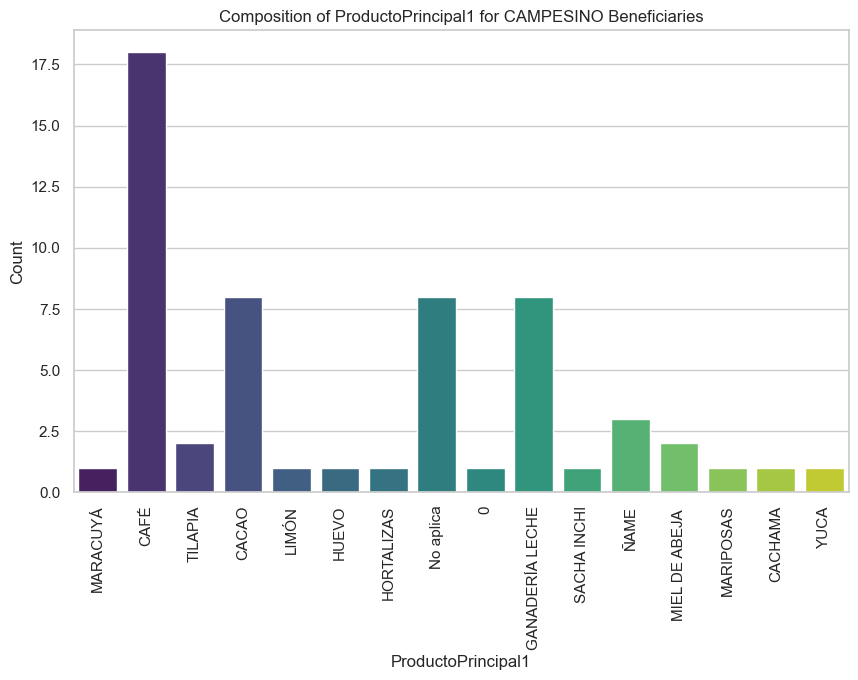

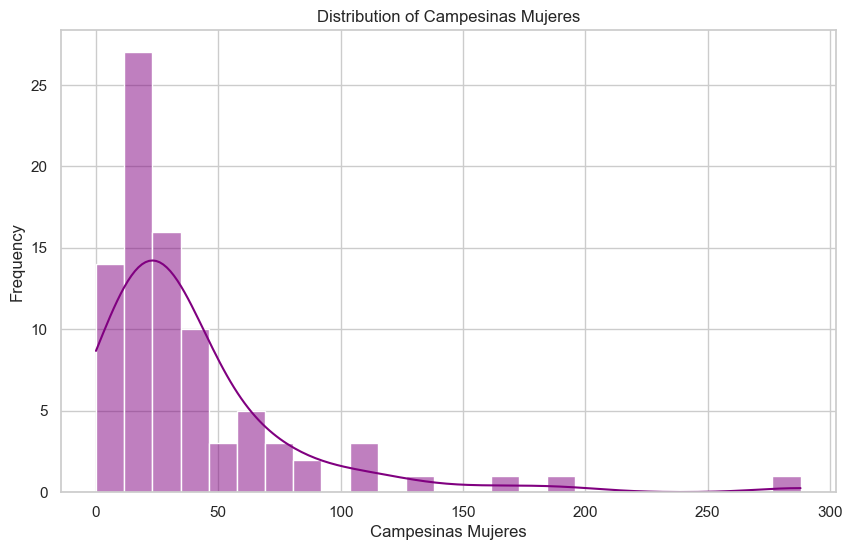

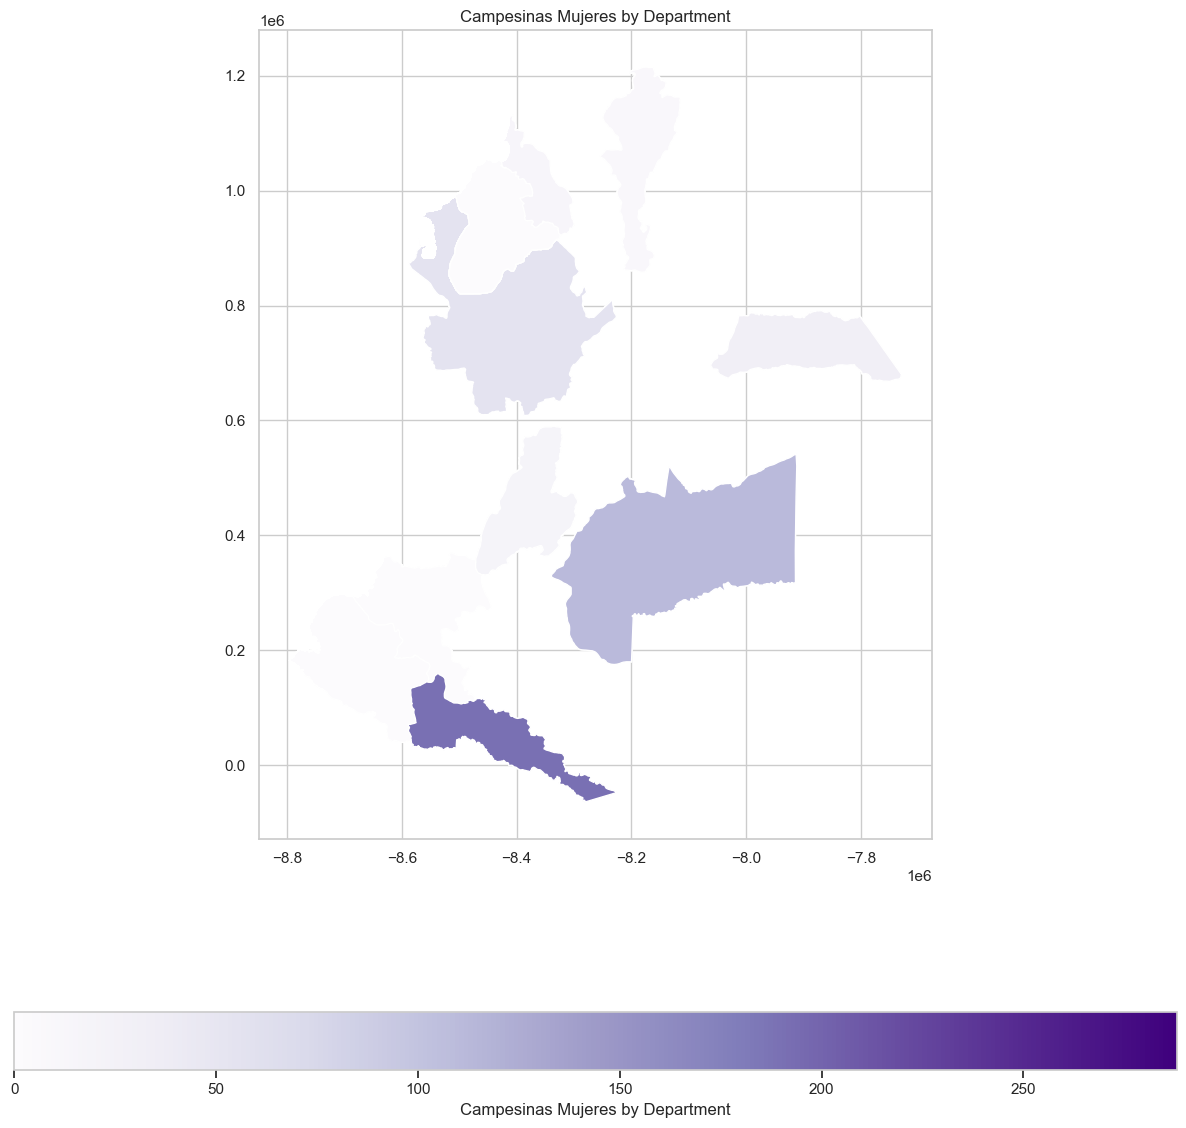

In [85]:
# Distribution plot for CampesinasMujeres
plt.figure(figsize=(10, 6))
sns.histplot(py_ini['CampesinasMujeres'], kde=True, color='purple')
plt.title('Distribution of Campesinas Mujeres')
plt.xlabel('Campesinas Mujeres')
plt.ylabel('Frequency')
plt.show()

# Merge the shapefile with the project data for CampesinasMujeres
merged_data_mujeres = dpto_shapefile.merge(py_ini, left_on='NAME_1', right_on='Departamento')

# Convert to Web Mercator projection (EPSG:3857) for compatibility with contextily
merged_data_mujeres = merged_data_mujeres.to_crs(epsg=3857)

# Plot the map with CampesinasMujeres
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_data_mujeres.plot(column='CampesinasMujeres', ax=ax, legend=True,
                         legend_kwds={'label': "Campesinas Mujeres by Department",
                                      'orientation': "horizontal"},
                         cmap='Purples')

plt.title('Campesinas Mujeres by Department')
plt.show()

# Propuestas Activas evaluadas

Propuestas evaluadas de los datos.

In [117]:
# Load the second row in the Excel file and specify the sheet name
prop_evl = pd.read_excel(file_path, sheet_name="Propuestas activos evaluadas ",skiprows=[0])

# Clean column names
prop_evl.columns = prop_evl.columns.str.replace('[^A-Za-z0-9]+', '_').str.strip()

# Display the cleaned column names
prop_evl.head()
print(prop_evl.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Hombres', 'Mujeres', 'Unnamed: 4',
       'Municipio', 'Departamento', 'Doméstica', 'Dispositivos de apoyo',
       'Productiva', 'Infraestructura'],
      dtype='object')


In [118]:
# Rename the columns
prop_evl.rename(columns={
    'Unnamed: 0': 'proy_code',
    'Unnamed: 1': 'concepto',
    'Hombres': 'Hombres',
    'Mujeres': 'Mujeres',
    'Unnamed: 4': 'poblacion'
}, inplace=True)

# Display the renamed columns
print(prop_evl.columns)

Index(['proy_code', 'concepto', 'Hombres', 'Mujeres', 'poblacion', 'Municipio',
       'Departamento', 'Doméstica', 'Dispositivos de apoyo', 'Productiva',
       'Infraestructura'],
      dtype='object')


/var/folders/dv/3wtcrb9s03n5nj64bl19r6qjqcgl9l/T/ipykernel_12930/3880814174.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dimension_sums.index, y=dimension_sums.values, palette="viridis")


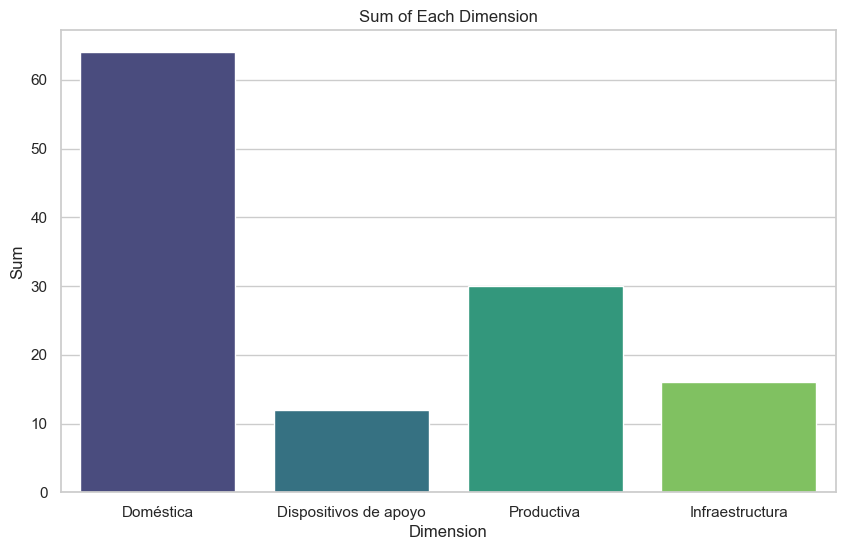

In [119]:
# Replace NaN values with 0 for summation
prop_evl['Doméstica'] = prop_evl['Doméstica'].fillna(0)
prop_evl['Dispositivos de apoyo'] = prop_evl['Dispositivos de apoyo'].fillna(0)
prop_evl['Productiva'] = prop_evl['Productiva'].fillna(0)
prop_evl['Infraestructura'] = prop_evl['Infraestructura'].fillna(0)

# Convert columns to binary (1 if not NaN, 0 if NaN)
prop_evl['Doméstica'] = prop_evl['Doméstica'].apply(lambda x: 1 if x != 0 else 0)
prop_evl['Dispositivos de apoyo'] = prop_evl['Dispositivos de apoyo'].apply(lambda x: 1 if x != 0 else 0)
prop_evl['Productiva'] = prop_evl['Productiva'].apply(lambda x: 1 if x != 0 else 0)
prop_evl['Infraestructura'] = prop_evl['Infraestructura'].apply(lambda x: 1 if x != 0 else 0)

# Sum the values for each dimension
dimension_sums = prop_evl[['Doméstica', 'Dispositivos de apoyo', 'Productiva', 'Infraestructura']].sum()

# Plot the sums
plt.figure(figsize=(10, 6))
sns.barplot(x=dimension_sums.index, y=dimension_sums.values, palette="viridis")
plt.title('Sum of Each Dimension')
plt.xlabel('Dimension')
plt.ylabel('Sum')
plt.show()

/var/folders/dv/3wtcrb9s03n5nj64bl19r6qjqcgl9l/T/ipykernel_12930/2393309886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=prop_evl, x='poblacion', palette="viridis")


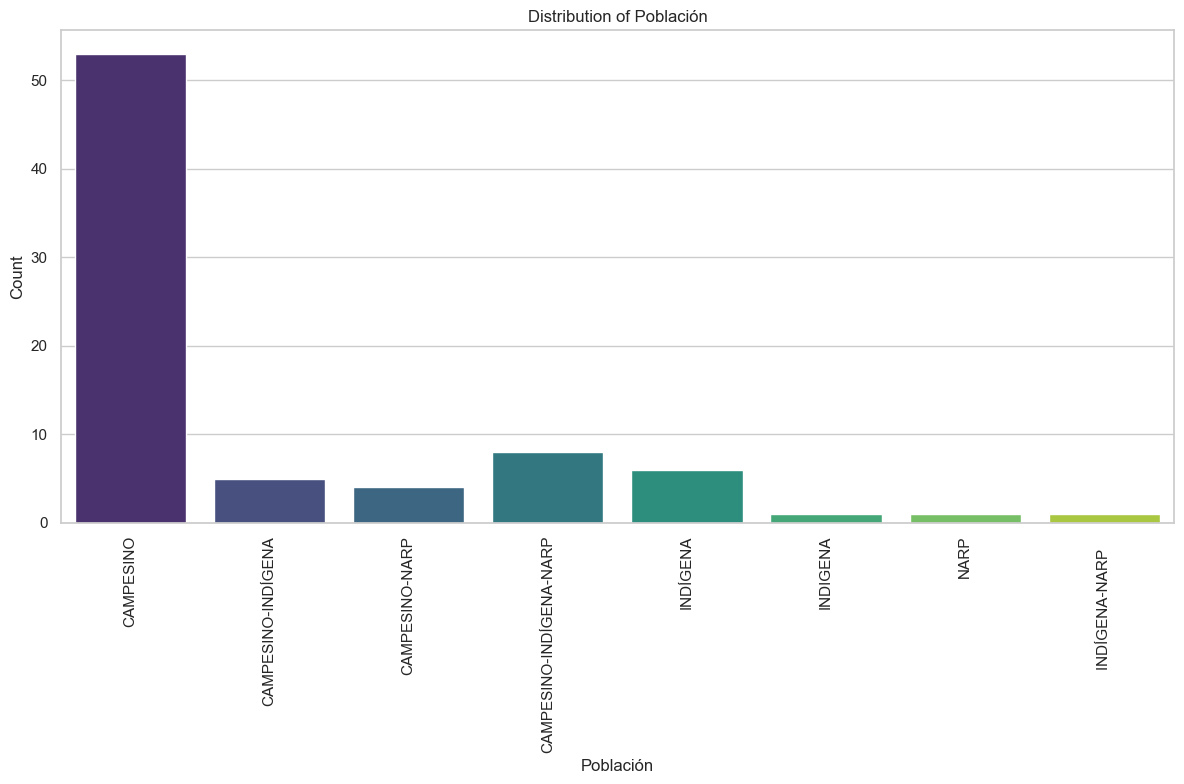

In [120]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Plot the distribution of "Población"
sns.countplot(data=prop_evl, x='poblacion', palette="viridis")

# Set plot title and labels
plt.title('Distribution of Población')
plt.xlabel('Población')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

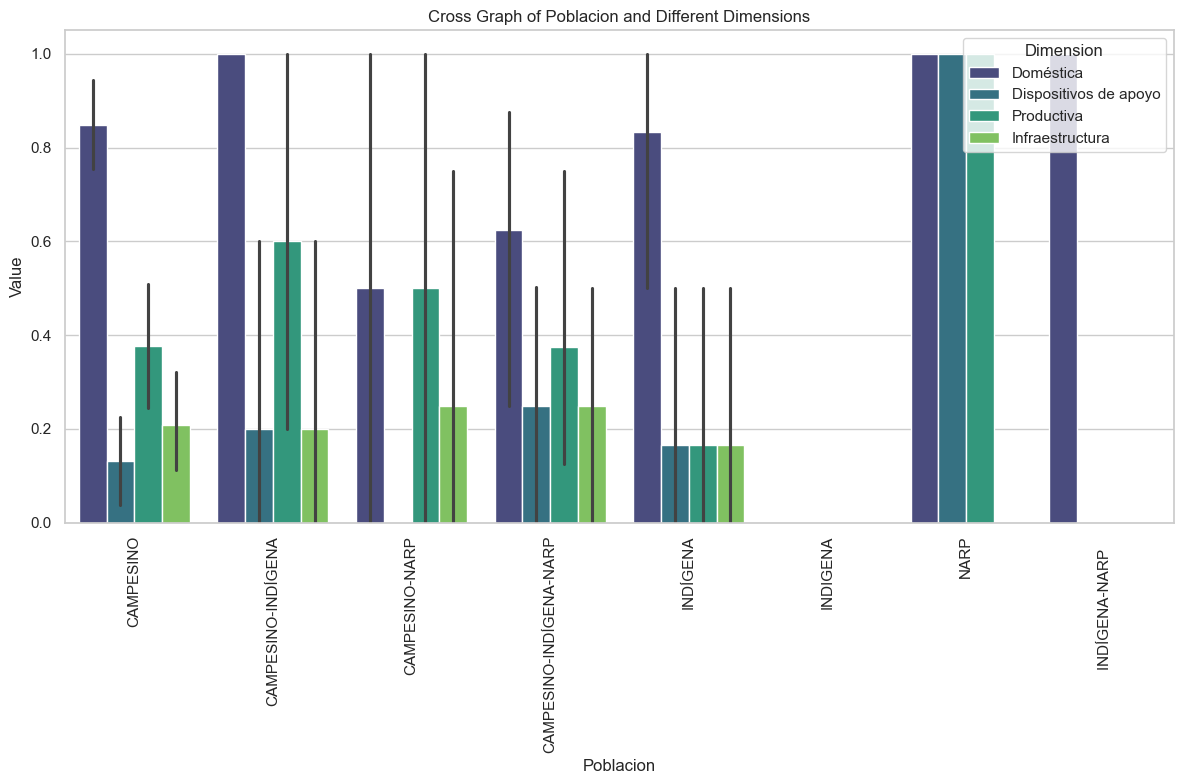

In [121]:
# Set the style for the plots
sns.set(style="whitegrid")

# Melt the dataframe to long format for easier plotting
melted_prop_evl = prop_evl.melt(id_vars=['poblacion'], value_vars=['Doméstica', 'Dispositivos de apoyo', 'Productiva', 'Infraestructura'], 
                                var_name='Dimension', value_name='Value')

# Create the grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_prop_evl, x='poblacion', y='Value', hue='Dimension', palette="viridis")

# Set plot title and labels
plt.title('Cross Graph of Poblacion and Different Dimensions')
plt.xlabel('Poblacion')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(title='Dimension')

# Show the plot
plt.tight_layout()
plt.show()

In [122]:
# Create a pivot table to cross-tabulate 'concepto' and 'poblacion'
cross_section = pd.pivot_table(prop_evl, values='proy_code', index='concepto', columns='poblacion', aggfunc='count', fill_value=0)

# Display the cross-section
print(cross_section)

poblacion  CAMPESINO  CAMPESINO-INDÍGENA  CAMPESINO-INDÍGENA-NARP  \
concepto                                                            
no viable          7                   0                        4   
viable            46                   5                        4   

poblacion  CAMPESINO-NARP  INDIGENA  INDÍGENA  INDÍGENA-NARP     NARP  
concepto                                                               
no viable               2         1         1                 0     0  
viable                  2         0         5                 1     1  


/var/folders/dv/3wtcrb9s03n5nj64bl19r6qjqcgl9l/T/ipykernel_12930/288650722.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=prop_evl, x='concepto', palette="viridis")


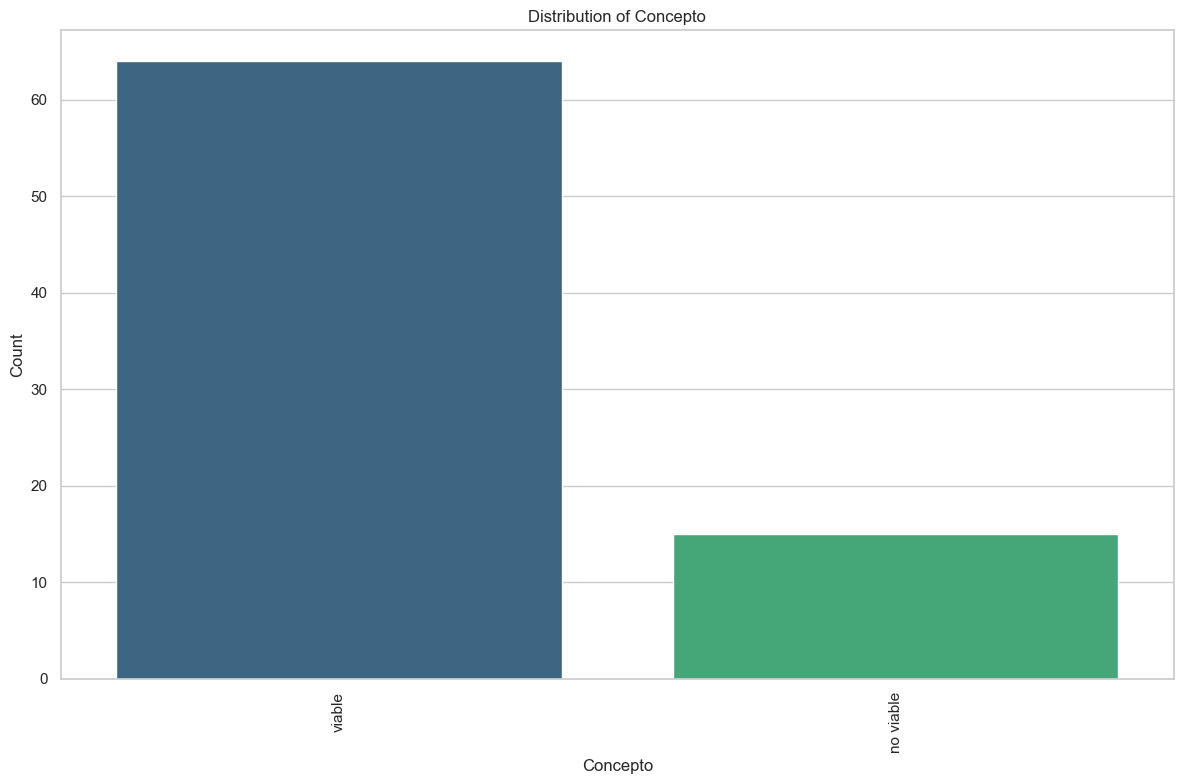

In [123]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Plot the distribution of "concepto"
sns.countplot(data=prop_evl, x='concepto', palette="viridis")

# Set plot title and labels
plt.title('Distribution of Concepto')
plt.xlabel('Concepto')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

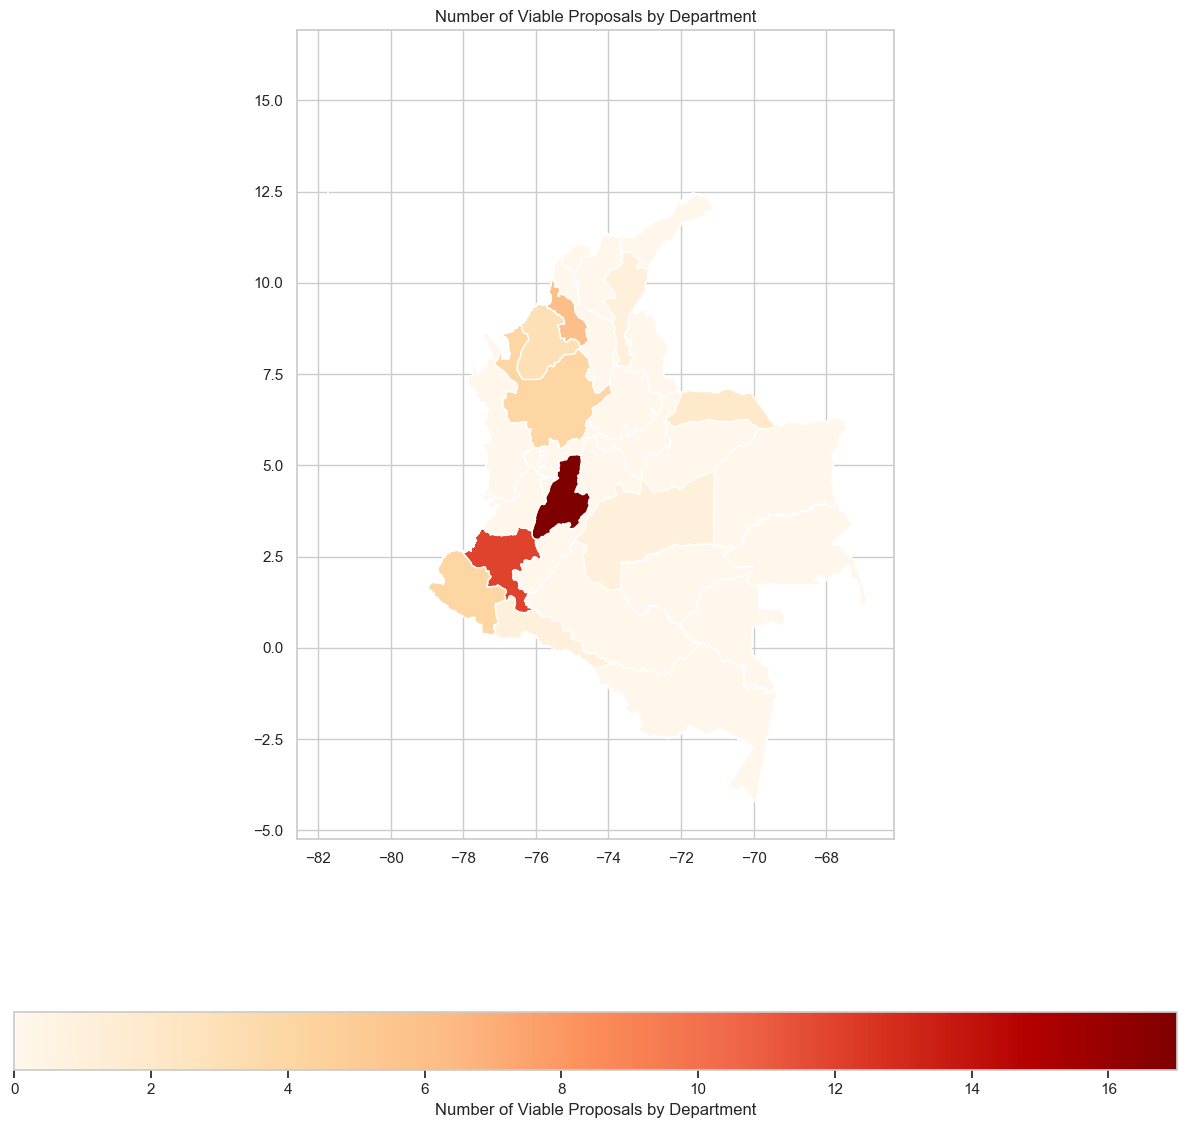

In [124]:
# Filter the data to include only viable proposals
viable_proposals = prop_evl[prop_evl['concepto'] == 'viable']

# Group by 'Departamento' and count the number of proposals
viable_proposals_count = viable_proposals.groupby('Departamento').size().reset_index(name='viable_proposals_count')

# Merge the grouped data with the department shapefile
merged_viable_data = dpto_shapefile.merge(viable_proposals_count, left_on='NAME_1', right_on='Departamento', how='left')

# Fill NaN values with 0 (for departments with no viable proposals)
merged_viable_data['viable_proposals_count'] = merged_viable_data['viable_proposals_count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_viable_data.plot(column='viable_proposals_count', ax=ax, legend=True,
                        legend_kwds={'label': "Number of Viable Proposals by Department",
                                     'orientation': "horizontal"},
                        cmap='OrRd')

plt.title('Number of Viable Proposals by Department')
plt.show()

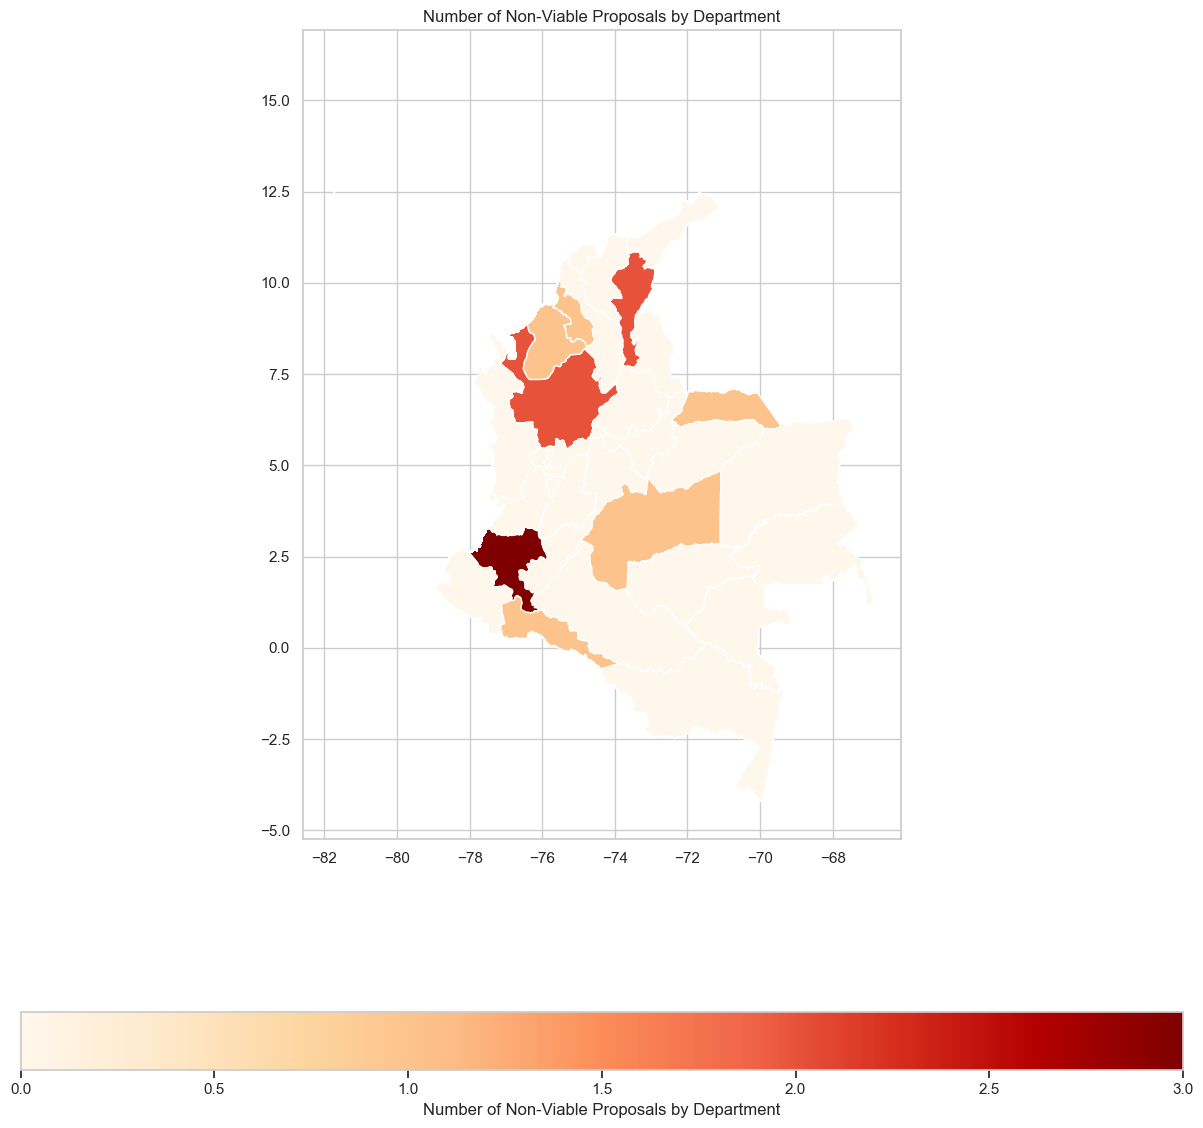

In [125]:
# Filter the data to include only non-viable proposals
non_viable_proposals = prop_evl[prop_evl['concepto'] != 'viable']

# Group by 'Departamento' and count the number of non-viable proposals
non_viable_proposals_count = non_viable_proposals.groupby('Departamento').size().reset_index(name='non_viable_proposals_count')

# Merge the grouped data with the department shapefile
merged_non_viable_data = dpto_shapefile.merge(non_viable_proposals_count, left_on='NAME_1', right_on='Departamento', how='left')

# Fill NaN values with 0 (for departments with no non-viable proposals)
merged_non_viable_data['non_viable_proposals_count'] = merged_non_viable_data['non_viable_proposals_count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_non_viable_data.plot(column='non_viable_proposals_count', ax=ax, legend=True,
                            legend_kwds={'label': "Number of Non-Viable Proposals by Department",
                                         'orientation': "horizontal"},
                            cmap='OrRd')

plt.title('Number of Non-Viable Proposals by Department')
plt.show()

Ahora vamos a comparar el total de proyectos con la propuesta evaluada

In [128]:
# Merge py_ini and prop_evl on 'No. Contrato' and 'proy_code'
merged_projects = py_ini.merge(prop_evl, left_on='No. Contrato', right_on='proy_code', how='inner')


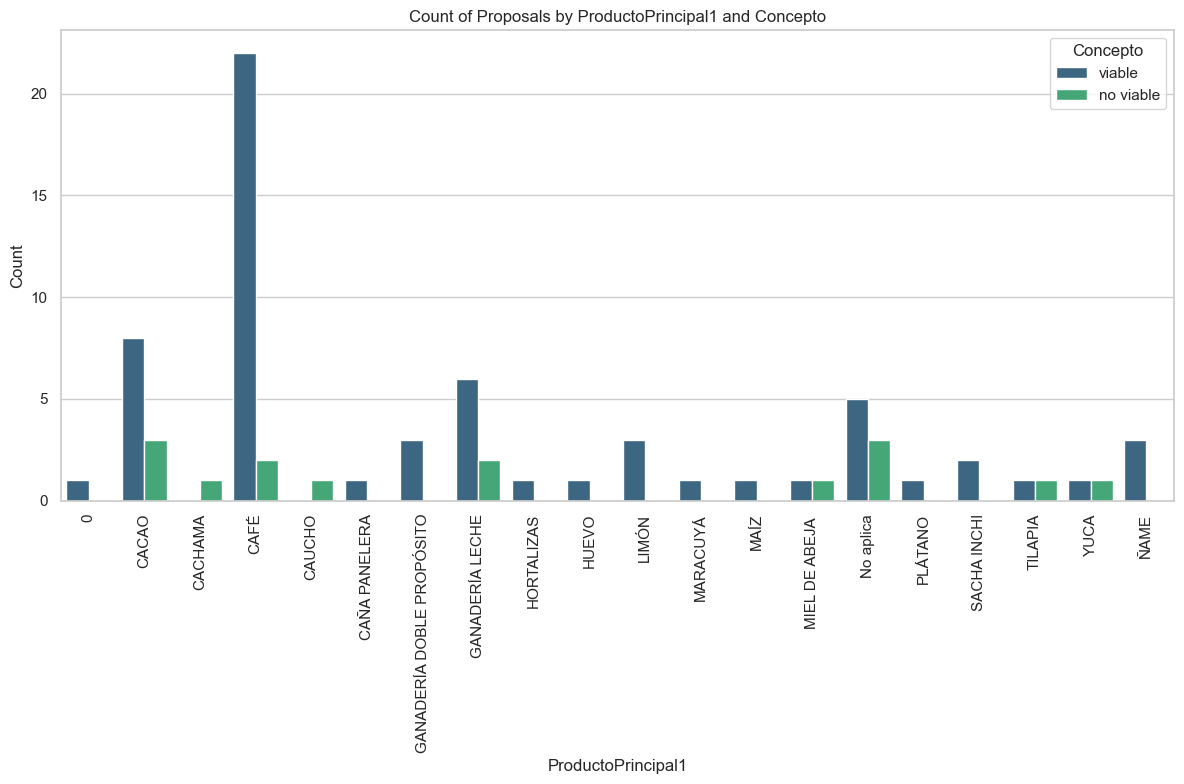

In [129]:
# Group by 'ProductoPrincipal1' and 'concepto' and count the occurrences
grouped_data = merged_projects.groupby(['ProductoPrincipal1', 'concepto']).size().reset_index(name='count')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(data=grouped_data, x='ProductoPrincipal1', y='count', hue='concepto', palette="viridis")

# Set plot title and labels
plt.title('Count of Proposals by ProductoPrincipal1 and Concepto')
plt.xlabel('ProductoPrincipal1')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Concepto')

# Show the plot
plt.tight_layout()
plt.show()

# Proyectos activos 

Ahora vamos a ver información de los proyectos activos.

In [107]:
prop_act= pd.read_excel(file_path, sheet_name="Propuestas activos TCR a nov. ")
prop_act.columns = prop_act.columns.str.replace('[^A-Za-z0-9]+', '_').str.strip()
print(prop_act.columns)

Index(['NumeroContrato', 'Activos a 15 noviembre', 'Departamento', 'Municipio',
       'Tipo de Beneficiario', 'TotalBeneficiariosDepartamento',
       'MujeresBeneficiarias', 'HombresBeneficiarios'],
      dtype='object')


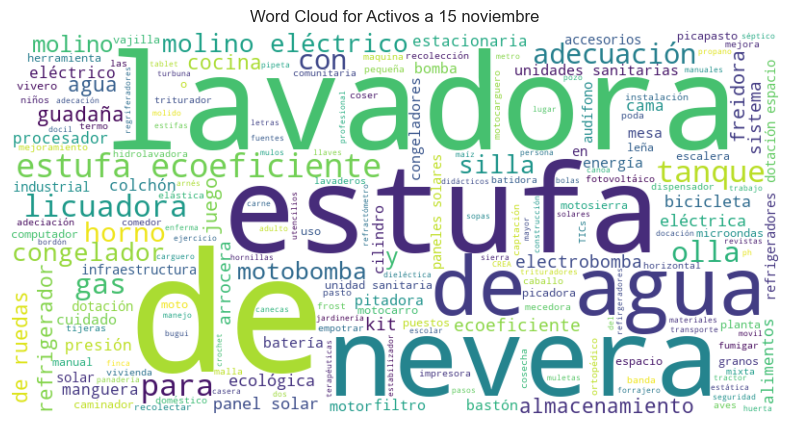

In [109]:
from wordcloud import WordCloud

# Combine all text in the 'Activos a 15 noviembre' column
text = " ".join(prop_act['Activos a 15 noviembre'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Activos a 15 noviembre')
plt.show()

/var/folders/dv/3wtcrb9s03n5nj64bl19r6qjqcgl9l/T/ipykernel_12930/2616699177.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=prop_act, x='Tipo de Beneficiario', palette="viridis")


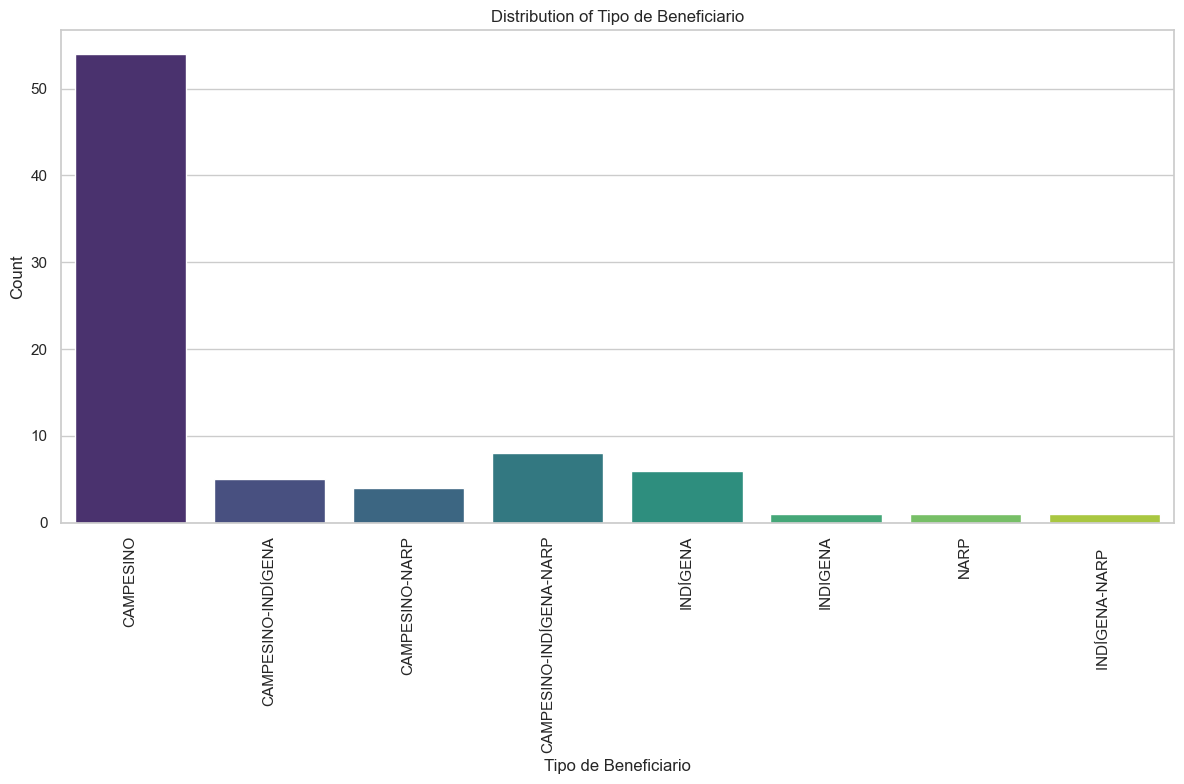

In [112]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Plot the distribution of "Tipo de Beneficiario"
sns.countplot(data=prop_act, x='Tipo de Beneficiario', palette="viridis")

# Set plot title and labels
plt.title('Distribution of Tipo de Beneficiario')
plt.xlabel('Tipo de Beneficiario')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

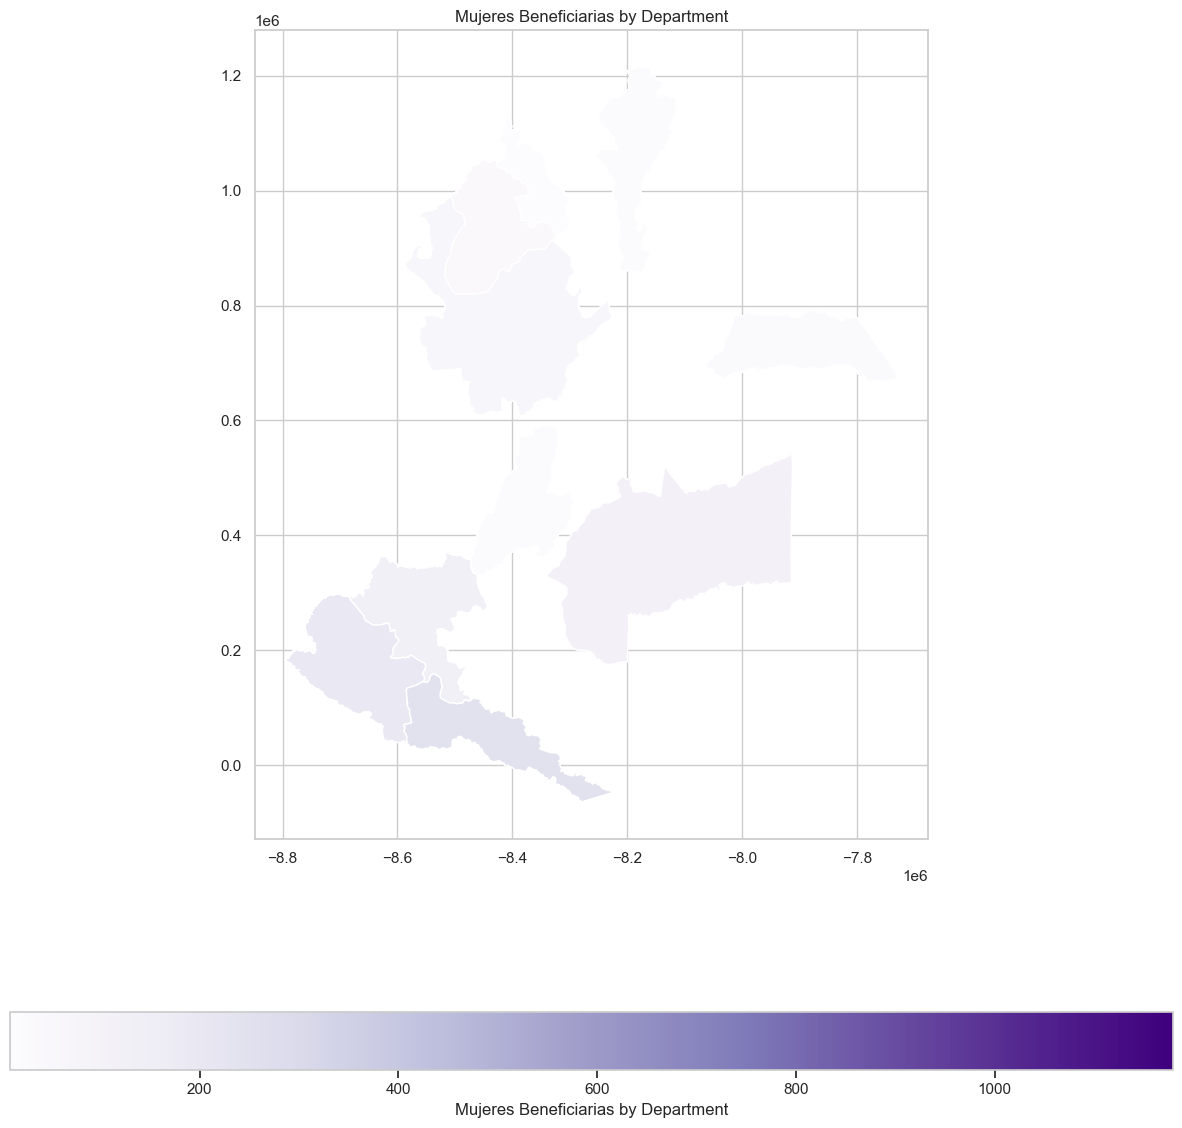

In [113]:
# Merge the shapefile with the project data for MujeresBeneficiarias
merged_data_mujeres = dpto_shapefile.merge(py_ini, left_on='NAME_1', right_on='Departamento')

# Convert to Web Mercator projection (EPSG:3857) for compatibility with contextily
merged_data_mujeres = merged_data_mujeres.to_crs(epsg=3857)

# Plot the map with MujeresBeneficiarias
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_data_mujeres.plot(column='MujeresBeneficiarias', ax=ax, legend=True,
                         legend_kwds={'label': "Mujeres Beneficiarias by Department",
                                      'orientation': "horizontal"},
                         cmap='Purples')

plt.title('Mujeres Beneficiarias by Department')
plt.show()

# Propuesta de muestreo

Quedarnos solo con los proyecto:
 
Criterio de selección:
- Proyectos productivos cuyas solicitudes para apoyo del cuidado fueron viables
- Proyectos que involucran a al menos 50 personas
- Campesinos

Qué necesitamos? necesitamos asignación aleatoria. 
- Tratamiento y control
- Power calculation (tamaño de la muestra)